In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import plotly.tools as tls
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from collections import Counter
from operator import itemgetter

#FILE TO LOAD
flight_data_to_load = "flightdata5y.csv"
flight_data_df = pd.read_csv(flight_data_to_load)

secondary_data_to_load = "airline_delay_causes.csv"
secondary_data_df = pd.read_csv(secondary_data_to_load)

flight_data_df.head()

,FLIGHTDATE,MONTH,Year,AIRLINECODE,AIRLINENAME,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,...,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,20160104,1,2016,DL,Delta Air Lines Inc.: DL,BIL,BillingsMT: Billings Logan International,Billings,MT,Montana,...,841.0,3.0,900,844.0,-16.0,120,111.0,F,F,748
1,20160110,1,2016,DL,Delta Air Lines Inc.: DL,BIL,BillingsMT: Billings Logan International,Billings,MT,Montana,...,837.0,4.0,902,841.0,-21.0,122,110.0,F,F,748
2,20160111,1,2016,OO,SkyWest Airlines Inc.: OO,BIL,BillingsMT: Billings Logan International,Billings,MT,Montana,...,1829.0,5.0,1855,1834.0,-21.0,85,72.0,F,F,387
3,20160116,1,2016,OO,SkyWest Airlines Inc.: OO,BIL,BillingsMT: Billings Logan International,Billings,MT,Montana,...,1402.0,12.0,1428,1414.0,-14.0,87,84.0,F,F,387
4,20160124,1,2016,DL,Delta Air Lines Inc.: DL,BIL,BillingsMT: Billings Logan International,Billings,MT,Montana,...,742.0,4.0,747,746.0,-1.0,87,89.0,F,F,387


In [2]:
flight_data_df.columns

Index(['FLIGHTDATE', 'MONTH', 'Year', 'AIRLINECODE', 'AIRLINENAME',
       'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME', 'ORIGINSTATE',
       'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME', 'DESTCITYNAME',
       'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME', 'DEPDELAY',
       'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME', 'ARRTIME',
       'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

In [3]:
flight_data_df = flight_data_df.loc[:, ["Year", "MONTH", "AIRLINENAME", "ORIGAIRPORTNAME", "DEPTIME", "DEPDELAY", "ARRTIME", "ARRDELAY", "CANCELLED", "DIVERTED"]]
flight_data_df.head()

,Year,MONTH,AIRLINENAME,ORIGAIRPORTNAME,DEPTIME,DEPDELAY,ARRTIME,ARRDELAY,CANCELLED,DIVERTED
0,2016,1,Delta Air Lines Inc.: DL,BillingsMT: Billings Logan International,553.0,-7.0,844.0,-16.0,F,F
1,2016,1,Delta Air Lines Inc.: DL,BillingsMT: Billings Logan International,551.0,-9.0,841.0,-21.0,F,F
2,2016,1,SkyWest Airlines Inc.: OO,BillingsMT: Billings Logan International,1722.0,-8.0,1834.0,-21.0,F,F
3,2016,1,SkyWest Airlines Inc.: OO,BillingsMT: Billings Logan International,1250.0,-11.0,1414.0,-14.0,F,F
4,2016,1,Delta Air Lines Inc.: DL,BillingsMT: Billings Logan International,617.0,-3.0,746.0,-1.0,F,F


In [4]:
total_airlines = flight_data_df['AIRLINENAME'].nunique()

pd.DataFrame([total_airlines], columns = ["Total Airlines"])

,Total Airlines
0,17


TOP 5 AIRLINES ARE AMERICAN, DELTA, UNITED, SOUTHWEST & SPIRIT.  CREATE A PIE CHART AND BAR CHART TO SEE WHICH AIRLINE HAS THE MOST CANCELLATIONS.

In [5]:
years= flight_data_df['Year'].unique()
years

array([2016, 2015, 2014, 2013, 2012])

FOR CANCELLATIONS, "F" MEANS IT WAS NOT CANCELLED, "T" MEANS IT WAS CANCELLED.  LET'S FIGURE OUT THE PERCENT CANCELLED USING A PIE CHART.

In [6]:
year_cancelled = flight_data_df.groupby('Year')['CANCELLED'].value_counts()
year_cancelled

Year  CANCELLED
2012  F            50982
      T              542
2013  F            52074
      T              592
2014  F            48096
      T             1612
2015  F            49870
      T              713
2016  F            32706
      T              501
Name: CANCELLED, dtype: int64

In [7]:
airline_cancellations = flight_data_df.groupby('AIRLINENAME')['CANCELLED'].value_counts()
airline_cancellations

AIRLINENAME                                                                              CANCELLED
AirTran Airways Corporation: FL                                                          F             4242
                                                                                         T               34
Alaska Airlines Inc.: AS                                                                 F             6788
                                                                                         T               45
American Airlines Inc.: AA                                                               F            21878
                                                                                         T              408
Delta Air Lines Inc.: DL                                                                 F            33347
                                                                                         T              230
Endeavor Air Inc.: 9E                

In [8]:
total_cancellations = flight_data_df['CANCELLED'].value_counts()
total_cancellations
pd.DataFrame([total_cancellations])

,F,T
CANCELLED,233728,3960


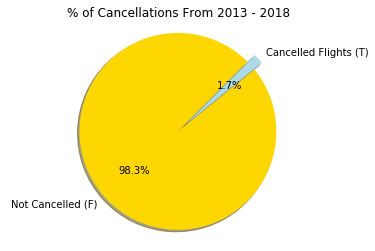

In [9]:
# Calculate Percents
pieplot = flight_data_df['CANCELLED'].value_counts()

#Build Pie Chart
labels = ['Not Cancelled (F)','Cancelled Flights (T)']
colors = ['gold','lightblue']
explode = (0, 0.1)
plt.title("% of Cancellations From 2013 - 2018")
plt.pie(pieplot, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=45)
plt.axis("equal")
plt.savefig("% of Cancellations From 2013-2018.png")
plt.show()


In [10]:
pd.DataFrame([airline_cancellations])
volume = pd.DataFrame([airline_cancellations]).T  #.T for transpose to change the columns to rows
volume.columns = ['VOLUME']
volume.head(10)

VOLUME
AIRLINENAME                     CANCELLED        
AirTran Airways Corporation: FL F            4242
                                T              34
Alaska Airlines Inc.: AS        F            6788
                                T              45
American Airlines Inc.: AA      F           21878
                                T             408
Delta Air Lines Inc.: DL        F           33347
                                T             230
Endeavor Air Inc.: 9E           F            2477
                                T              53

In [11]:
airline_volume = volume.groupby('AIRLINENAME').sum()
airline_volume


,VOLUME
AIRLINENAME,
AirTran Airways Corporation: FL,4276
Alaska Airlines Inc.: AS,6833
American Airlines Inc.: AA,22286
Delta Air Lines Inc.: DL,33577
Endeavor Air Inc.: 9E,2530
Envoy Air: MQ,12089
ExpressJet Airlines Inc.: EV,25656
Frontier Airlines Inc.: F9,3084
Hawaiian Airlines Inc.: HA,3425


In [12]:
#TRIED CHANGING US AIRWAYS NAME TO SHORTEN IT
#airline_volume = airline_volume.replace({'US Airways Inc.: US (Merged with America West 9/05. Reporting for both starting 10/07.)': 'US Airways Inc.: US'})
#airline_volume

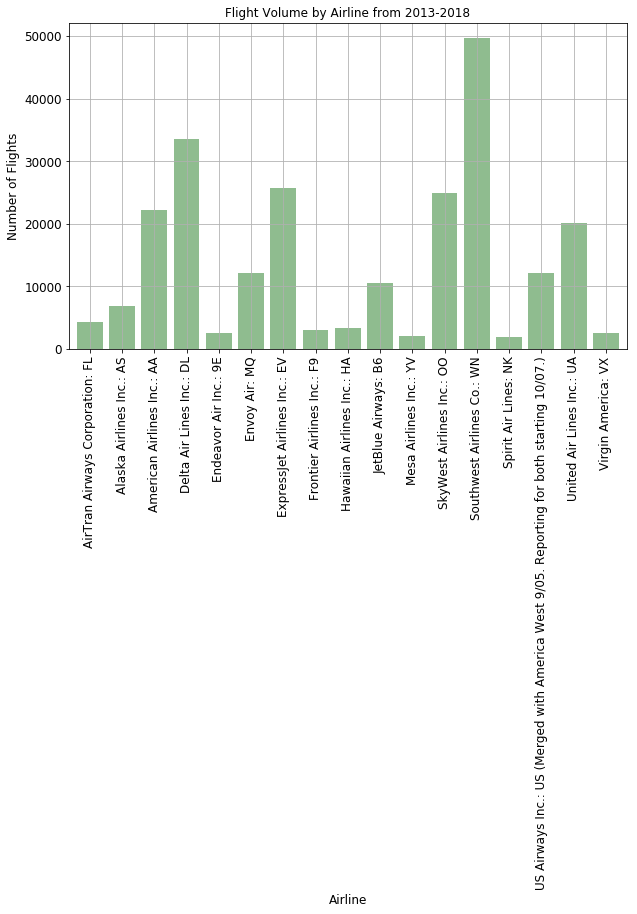

In [35]:
labels2 = ['FL', 'AS', 'AA', 'DL', '9E', 'MQ', 'EV', 'F9', 'HA', 'B6', 'YV', 'OO', 'WN', 'NK', 'US', 'UA', 'VX']
bar_chart = airline_volume[['VOLUME']].plot(kind='bar', title ="Flight Volume by Airline from 2013-2018",
                                            color='darkseagreen', width=0.8, figsize=(10, 6), grid=None, legend=False, 
                                            fontsize=12)
bar_chart.set_xlabel("Airline", fontsize=12)
bar_chart.set_ylabel("Number of Flights", fontsize=12)

plt.rcParams["axes.grid.axis"] ="y"  #sets grid to only show y-axis
plt.rcParams["axes.grid"] = True

plt.savefig("Flight Volume by Airline.png", bbox_inches="tight")
plt.show()

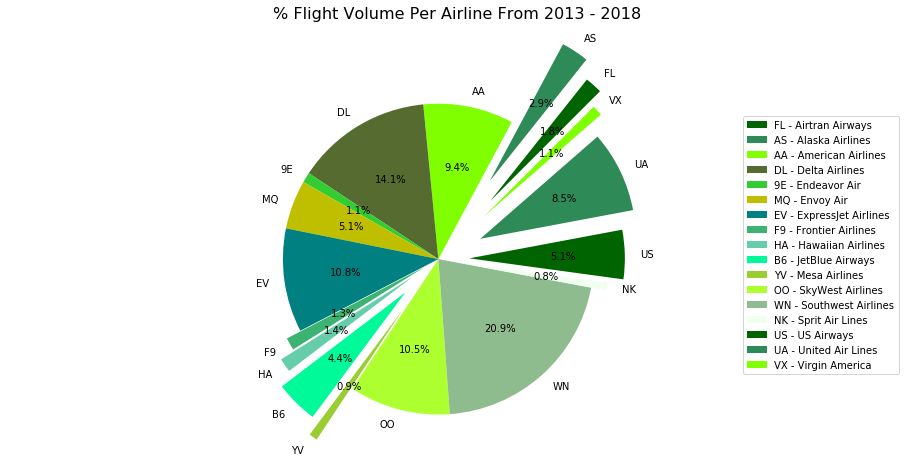

In [15]:
# Calculate Percents for Flight Volume per Airline
plot = volume.groupby('AIRLINENAME').sum()
plt.figure(figsize=(16,8))
#Build Pie Chart
#labels = volume['AIRLINENAME']
labels = ['FL - Airtran Airways', 'AS - Alaska Airlines', 'AA - American Airlines', 'DL - Delta Airlines', 
          '9E - Endeavor Air', 'MQ - Envoy Air', 'EV - ExpressJet Airlines', 'F9 - Frontier Airlines',
          'HA - Hawaiian Airlines', 'B6 - JetBlue Airways', 'YV - Mesa Airlines', 'OO - SkyWest Airlines', 
          'WN - Southwest Airlines', 'NK - Sprit Air Lines', 'US - US Airways', 'UA - United Air Lines', 
          'VX - Virgin America']
labels2 = ['FL', 'AS', 'AA', 'DL', '9E', 'MQ', 'EV', 'F9', 'HA', 'B6', 'YV', 'OO', 'WN', 'NK', 'US', 'UA', 'VX']
colors = ['darkgreen','seagreen', 'chartreuse', 'darkolivegreen', 'limegreen', 
         'y', 'teal', 'mediumseagreen', 'mediumaquamarine', 'mediumspringgreen',
         'yellowgreen', 'greenyellow', 'darkseagreen', 'honeydew']
explode = (0.5, 0.6, 0, 0, 0, 0, 0, 0.1, 0.2, 0.3, 0.4, 0, 0, 0.1, 0.2, 0.3, 0.4)
plt.title("% Flight Volume Per Airline From 2013 - 2018", fontsize=16)
plt.pie(plot, explode=explode, labels=labels2, colors=colors, autopct="%1.1f%%",shadow=False, startangle=45)
plt.axis("equal")
plt.legend(
    bbox_to_anchor=(1, 0.8),
    loc="best",
    labels=labels)
plt.savefig("% Flight Volume Per Airline From 2013-2018.png", bbox_inches="tight")
plt.show()


AVERAGE DELAY BY MONTH:

In [16]:
flight_data_df.head()

,Year,MONTH,AIRLINENAME,ORIGAIRPORTNAME,DEPTIME,DEPDELAY,ARRTIME,ARRDELAY,CANCELLED,DIVERTED
0,2016,1,Delta Air Lines Inc.: DL,BillingsMT: Billings Logan International,553.0,-7.0,844.0,-16.0,F,F
1,2016,1,Delta Air Lines Inc.: DL,BillingsMT: Billings Logan International,551.0,-9.0,841.0,-21.0,F,F
2,2016,1,SkyWest Airlines Inc.: OO,BillingsMT: Billings Logan International,1722.0,-8.0,1834.0,-21.0,F,F
3,2016,1,SkyWest Airlines Inc.: OO,BillingsMT: Billings Logan International,1250.0,-11.0,1414.0,-14.0,F,F
4,2016,1,Delta Air Lines Inc.: DL,BillingsMT: Billings Logan International,617.0,-3.0,746.0,-1.0,F,F


In [17]:
departure_delay = flight_data_df.groupby('AIRLINENAME')['DEPDELAY'].mean()
departure_delay
departure = pd.DataFrame([departure_delay]).T
departure

,DEPDELAY
AIRLINENAME,
AirTran Airways Corporation: FL,3.327676
Alaska Airlines Inc.: AS,0.404299
American Airlines Inc.: AA,8.628169
Delta Air Lines Inc.: DL,6.404264
Endeavor Air Inc.: 9E,4.798147
Envoy Air: MQ,8.676116
ExpressJet Airlines Inc.: EV,11.109141
Frontier Airlines Inc.: F9,10.831000
Hawaiian Airlines Inc.: HA,-0.365818


In [18]:
arrival_delay = flight_data_df.groupby('AIRLINENAME')['ARRDELAY'].mean()
arrival = pd.DataFrame([arrival_delay]).T
arrival

,ARRDELAY
AIRLINENAME,
AirTran Airways Corporation: FL,-0.256792
Alaska Airlines Inc.: AS,-2.204905
American Airlines Inc.: AA,4.101757
Delta Air Lines Inc.: DL,0.256910
Endeavor Air Inc.: 9E,0.403395
Envoy Air: MQ,6.878009
ExpressJet Airlines Inc.: EV,7.681293
Frontier Airlines Inc.: F9,9.805882
Hawaiian Airlines Inc.: HA,0.408438


In [19]:
combined_delays = pd.merge(departure, arrival, on="AIRLINENAME", how="outer")
combined_delays


,DEPDELAY,ARRDELAY
AIRLINENAME,,
AirTran Airways Corporation: FL,3.327676,-0.256792
Alaska Airlines Inc.: AS,0.404299,-2.204905
American Airlines Inc.: AA,8.628169,4.101757
Delta Air Lines Inc.: DL,6.404264,0.256910
Endeavor Air Inc.: 9E,4.798147,0.403395
Envoy Air: MQ,8.676116,6.878009
ExpressJet Airlines Inc.: EV,11.109141,7.681293
Frontier Airlines Inc.: F9,10.831000,9.805882
Hawaiian Airlines Inc.: HA,-0.365818,0.408438


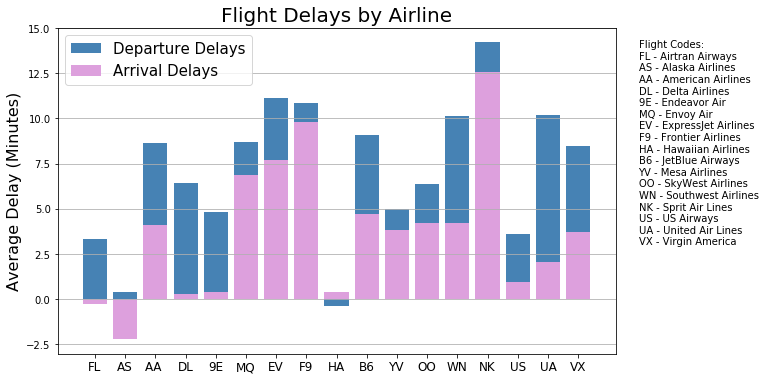

In [23]:
labels = ['FL', 'AS', 'AA ', 'DL', 
          '9E', 'MQ', 'EV', 'F9',
          'HA', 'B6', 'YV', 'OO', 
          'WN', 'NK', 'US', 'UA', 
          'VX']
x=range(17)
plt.figure(figsize=(10,6))
plt.bar(x, combined_delays['DEPDELAY'], color = 'steelblue', label='Departure Delays')
plt.bar(x, combined_delays['ARRDELAY'], bottom=0, color='plum', label='Arrival Delays')

plt.title('Flight Delays by Airline', fontsize=20)
plt.ylabel('Average Delay (Minutes)', fontsize=16) 
plt.legend(loc='upper left', fontsize=15)
plt.xticks(x, labels, rotation='horizontal', fontsize=12)
plt.rcParams["axes.grid.axis"] ="y"  #sets grid to only show y-axis
plt.rcParams["axes.grid"] = True

textstr = 'Flight Codes:\nFL - Airtran Airways\nAS - Alaska Airlines\nAA - American Airlines\nDL - Delta Airlines\n9E - Endeavor Air\nMQ - Envoy Air\nEV - ExpressJet Airlines\nF9 - Frontier Airlines\nHA - Hawaiian Airlines\nB6 - JetBlue Airways\nYV - Mesa Airlines\nOO - SkyWest Airlines\nWN - Southwest Airlines\nNK - Sprit Air Lines\nUS - US Airways\nUA - United Air Lines\nVX - Virgin America'
plt.text(18, 3, textstr, fontsize=10)

plt.savefig("Flight Delays by Airline.png", bbox_inches="tight")
plt.show()